### Initialize Unity communication

In [69]:
import json
import os

In [70]:
os.chdir('../')

In [60]:
from graph_export.scriptcheck import UnityCommunication

comm = UnityCommunication()

In [61]:
comm.reset()

True

#### Define some functions for manipulating the environment graph

In [86]:
def find_nodes(graph, **kwargs):
    if len(kwargs) == 0:
        return None
    else:
        k, v = next(iter(kwargs.items()))
        return [n for n in graph['nodes'] if n[k] == v]
    
def find_edges_from(graph, id):
    nb_list = [(e['relation_type'], e['to_id']) for e in graph['edges'] if e['from_id'] == id]
    return [(rel, find_nodes(graph, id=n_id)[0]) for (rel, n_id) in nb_list]

def clean_graph(graph):
    """
    Remove bounds to reflect real input by Andrew & Xavier
    """
    new_nodes = []
    for n in graph['nodes']:
        nc = dict(n)
        if 'bounding_box' in nc:
            del nc['bounding_box']
        new_nodes.append(nc)
    return {'nodes': new_nodes, 'edges': list(graph['edges'])}
    

def remove_edges(graph, n, fr=True, to=True):
    n_id = n['id']
    new_edges = [e for e in graph['edges'] if 
                 (e['from_id'] != n_id or not fr) and (e['to_id'] != n_id or not to)]
    graph['edges'] = new_edges

def remove_edge(graph, fr_id, rel, to_id):
    new_edges = [e for e in graph['edges'] if 
                 not (e['from_id'] == fr_id and e['to_id'] == to_id and e['relation_type'] == rel)]
    graph['edges'] = new_edges
    
def add_node(graph, n):
    graph['nodes'].append(n)

def add_edge(graph, fr_id, rel, to_id):
    graph['edges'].append({'from_id': fr_id, 'relation_type': rel, 'to_id': to_id})
    
def clean_graph(graph):
    """
    Remove bounds to reflect real input by Andrew & Xavier
    """
    new_nodes = []
    for n in graph['nodes']:
        nc = dict(n)
        if 'bounding_box' in nc:
            del nc['bounding_box']
        new_nodes.append(nc)
    return {'nodes': new_nodes, 'edges': list(graph['edges'])}

def add_cat(graph):
    graph_1 = clean_graph(graph)
    sofa = find_nodes(graph_1, class_name='sofa')[-2]
    add_node(graph_1, {'class_name': 'cat', 'category': 'Animals', 'id': 1000, 'properties': [], 'states': []})
    add_edge(graph_1, 1000, 'ON', sofa['id'])
    return graph_1

In [75]:
success, graph = comm.environment_graph()

In [79]:
aux = [x for x in graph['nodes'] if x['class_name'] == 'character']

In [83]:
aux[0]['bounding_box']['center'] = [4.09599972, 0.0, -4.07345963]

In [85]:
success, message = comm.expand_scene(graph)

In [90]:
aux = [x for x in graph['nodes'] if x['class_name'] == 'character']
aux[0]
success, message = comm.expand_scene(graph)

# Scene start

79


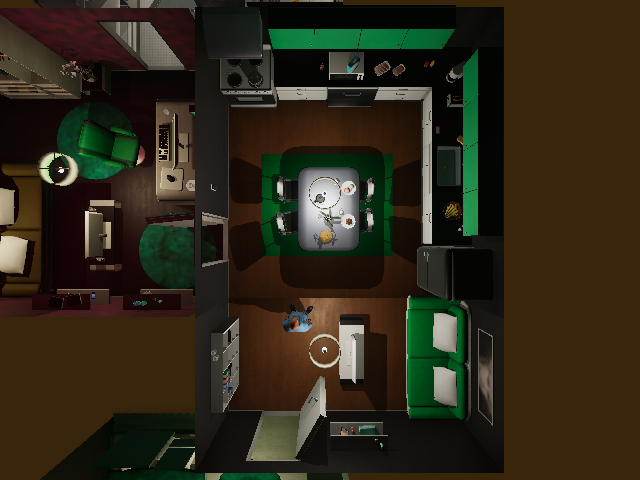

In [98]:
import IPython.display
import PIL
_, ncameras = comm.camera_count()
print(ncameras)
aux = [x for x in graph['nodes'] if x['class_name'] == 'character']
aux[0]['bounding_box']['center'] = [0.09599972, 0.0, -4.07345963]
success, message = comm.expand_scene(graph)
cameras_select = list(range(ncameras))
cameras_select = [cameras_select[-10]]
(ok_img, imgs) = comm.camera_image(cameras_select, mode='normal')
IPython.display.display(PIL.Image.fromarray(imgs[-1][:,:,::-1]))


In [99]:
success, graph = comm.environment_graph()

In [100]:
graph['nodes'][0]

{'bounding_box': {'center': [-0.0313837528, 1.24901164, -1.24998593],
  'size': [5.062842, 2.50202322, 5.00004625]},
 'category': 'Rooms',
 'class_name': 'livingroom',
 'id': 1,
 'prefab_name': 'PRE_ROO_Livingroom_07',
 'properties': [],
 'states': []}

## Add object and view

In [101]:
comm.reset()
success, graph = comm.environment_graph()
graph_1 = add_cat(graph)
success, message = comm.expand_scene(graph_1)

[69]


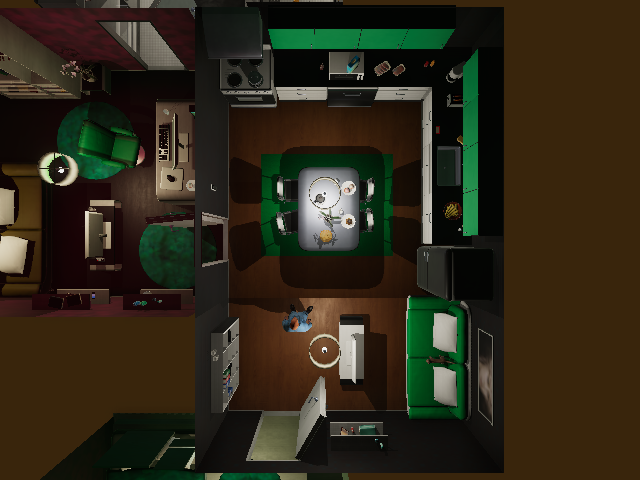

In [102]:
_, ncameras = comm.camera_count()
cameras_select = list(range(ncameras))
cameras_select = [cameras_select[-10]]
print(cameras_select)


(ok_img, imgs) = comm.camera_image(cameras_select, mode='normal')
IPython.display.display(PIL.Image.fromarray(imgs[-1][:,:,::-1]))

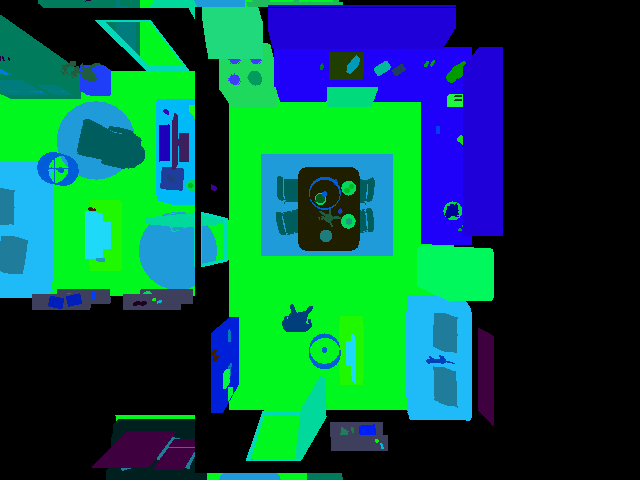

In [22]:
(ok_img, imgs) = comm.camera_image(cameras_select, mode='seg_class')
IPython.display.display(PIL.Image.fromarray(imgs[-1][:,:,::-1]))

In [103]:
script = ['[Walk] <cat> (1000)', '[Grab] <cat> (1000)']
success, message = comm.render_script(script=script, capture_screenshot=True, find_solution=False, camera_mode='FIRST_PERSON')

In [107]:
comm.reset()
graph_1 = add_cat(graph)
success, message = comm.expand_scene(graph_1)
script = ['[Walk] <cat> (1)', '[Grab] <cat> (1)', 
          '[Walk] <fridge> (1)', '[Open] <fridge> (1)', '[PutIn] <cat> (1) <fridge> (1)']
success, message = comm.render_script(frame_rate=10, script=script, capture_screenshot=True, find_solution=True, camera_mode='PERSON_TOP')

# END

### Examples - tested  to work on scene 7!

#### Put a cat to a sofa and grab it

In [6]:
comm.reset()
success, graph = comm.environment_graph()

In [15]:
cameras_select = [50]
(ok_img, imgs) = comm.camera_image(cameras_select, mode=mode)


Adjust environment graph (put a cat to the sofa)

In [7]:
graph_1 = clean_graph(graph)
sofa = find_nodes(graph_1, class_name='sofa')[0]
add_node(graph_1, {'class_name': 'cat', 'category': 'Animals', 'id': 1000, 'properties': [], 'states': []})
add_edge(graph_1, 1000, 'ON', sofa['id'])

In [8]:
success, message = comm.expand_scene(graph_1)

Execute and render script "find and grab the cat"

In [9]:
script = ['[Walk] <cat> (1)', '[Grab] <cat> (1)']
success, message = comm.render_script(script=script, capture_screenshot=True, find_solution=True, camera_mode='FIRST_PERSON')

In [11]:
comm.reset()
success, message = comm.expand_scene(graph_1)

In [13]:
script = ['[Walk] <cat> (1)', '[Grab] <cat> (1)']
success, message = comm.render_script(script=script, capture_screenshot=True, find_solution=True, camera_mode='PERSON_TOP')

Paramters to render_script are:
- script: a list of script lines
- randomize_execution: randomly choose elements
- random_seed: random seed to use when randomizing execution, -1 means that the seed is not set
- find_solution: find solution (True) or use graph ids to determine object instances (False)
- processing_time_limit: time limit for finding a solution
- skip_execution: skip rendering, only check if a solution exists
- output_folder: folder to output renderings, default is Output/
- file_name_prefix: prefix of created files (screenshots are put to output_folder/file_name_prefix/)
- frame_rate: frame rate
- capture_screenshot: save screenshots
- image_synthesis: save depth, segmentation, flow images
- save_pose_data: save pose data
- save_scene_states: save scene states
- character_resource: path to character resource to be used
- camera_mode: automatic (AUTO), first person (FIRST_PERSON), top (PERSON_TOP), front person view (PERSON_FRONT)

In [42]:
success

True

In [43]:
message

#### Grab mug, go to toilet, sit on toilet, open fridge

In [61]:
comm.reset()
success, graph = comm.environment_graph()

In [62]:
mug_id = find_nodes(graph, class_name='mug')[0]['id']
toilet_id = find_nodes(graph, class_name='toilet')[0]['id']
fridge_id = find_nodes(graph, class_name='fridge')[0]['id']

Use ids from environment graph, do not let Unity to find a solution

In [63]:
script = ['[Walk] <mug> ({})'.format(mug_id), 
          '[Grab] <mug> ({})'.format(mug_id),
          '[Walk] <toilet> ({})'.format(toilet_id),
          '[Sit] <toilet> ({})'.format(toilet_id),
          '[Walk] <fridge> ({})'.format(fridge_id),
          '[Open] <fridge> ({})'.format(fridge_id)]          
success, message = comm.render_script(script=script, capture_screenshot=True, find_solution=False, camera_mode='PERSON_FRONT')

#### Put tv on table (prepare scene only, no rendering)

In [10]:
comm.reset()
success, graph = comm.environment_graph()

In [11]:
graph_1 = clean_graph(graph)
table = find_nodes(graph_1, class_name='kitchentable')[0]
new_node = {'class_name': 'tv', 'category': 'Electronics', 'id': 1000, 
            'properties': ['HAS_SWITCH', 'LOOKABLE', 'HAS_PLUG'], 'states': ['OFF']}
add_node(graph_1, new_node)
add_edge(graph_1, 1000, 'ON', table['id'])

In [12]:
success, message = comm.expand_scene(graph_1, ignore_placing_obstacles=True)

Note new option __ignore_placing_obstacles__ which allows an object to be put even if it collides with other object on the destination

In [13]:
success

True

In [14]:
message

{}

#### Put a lamp on a table, turn it on, turn other lights off (scene preparation example)

In [15]:
comm.reset()
success, graph = comm.environment_graph()

Put a lamp to coffee table with initial state set to "off"

In [16]:
graph_1 = clean_graph(graph)
table = find_nodes(graph_1, class_name='coffeetable')[0]
new_node = {'class_name': 'tablelamp', 'category': 'Lamps', 'id': 1000, 
            'properties': ['HAS_SWITCH'], 'states': ['OFF']}
add_node(graph_1, new_node)
add_edge(graph_1, 1000, 'ON', table['id'])
success, message = comm.expand_scene(graph_1, ignore_placing_obstacles=True)

Turn off all lights

In [17]:
graph_2 = clean_graph(graph_1)
lsws = find_nodes(graph_2, class_name='lightswitch')
for ls in lsws:
    ls['states'] =  ['OFF']
success, message = comm.expand_scene(graph_2)

Turn on the lamp

In [18]:
graph_3 = clean_graph(graph_2)
tlamps = find_nodes(graph_3, id=1000)
for ls in tlamps:
    ls['states'] =  ['ON']
success, message = comm.expand_scene(graph_3)